Zadanie 3 (1 pkt) <br>
Podobnie jak w zadaniu 2, przeprowadź klasyfikację wykorzystując sensowną sieć <br>
neuronową dla bazy danych z kobietami z cukrzycą (diabetes.csv). <br>
Porównaj wyniki sieci neuronowej z poprzednimi klasyfikatorami. <br>

Poprzednie klasyfikatory <br>
• k-NN, k=3 <br>
• k-NN, k=5 <br>
• k-NN, k=11 <br>
• Naiwny bayesowski. <br>
• Drzewa decyzyjne.


### Uruchomienie klasyfikatorów <br> ewaluacja na zbiorze testowym <br> wyświetlenie procentowej dokładności i macierzy błędu.

DRZEWA DECYZYJNE <br>
KNN 3-/5-/11-NN <br>
NAIVE BAYES

------------------------------------
### DRZEWA DECYZYJNE: 
------------------------------------

///ctree  (https://www.rdocumentation.org/packages/partykit/versions/1.2-5/topics/ctree)

In [3]:
diabetes <- read.csv(url("https://gitlab.com/Nadolny/zbior_przykladow_kodowych/-/raw/master/laboratoria_inteligencja_obliczeniowa/zbiory_danych/diabetes_lab5/diabetes.csv"), header = TRUE)

ind <- sample(2,nrow(diabetes), replace=TRUE, prob=c(0.7,0.3))
trainingData <- diabetes[ind==1,]
testData <- diabetes[ind==2,]

diabetes

pregnant.times glucose.concentr blood.pressure skin.thickness insulin
1    6             148              72             35               0    
2    1              85              66             29               0    
3    8             183              64              0               0    
4    1              89              66             23              94    
5    0             137              40             35             168    
6    5             116              74              0               0    
7    3              78              50             32              88    
8   10             115               0              0               0    
9    2             197              70             45             543    
10   8             125              96              0               0    
11   4             110              92              0               0    
12  10             168              74              0               0    
13  10             139              80              0               0    
14   1             189              60             23             846    
15   5             166              72             19             175    
16   7             100               0              0               0    
17   0             118              84             47             230    
18   7             107              74              0               0    
19   1             103              30             38              83    
20   1             115              70             30              96    
21   3             126              88             41             235    
22   8              99              84              0               0    
23   7             196              90              0               0    
24   9             119              80             35               0    
25  11             143              94             33             146    
26  10             125              70             26             115    
27   7             147              76              0               0    
28   1              97              66             15             140    
29  13             145              82             19             110    
30   5             117              92              0               0    
... ...            ...              ...            ...            ...    
739  2              99              60             17             160    
740  1             102              74              0               0    
741 11             120              80             37             150    
742  3             102              44             20              94    
743  1             109              58             18             116    
744  9             140              94              0               0    
745 13             153              88             37             140    
746 12             100              84             33             105    
747  1             147              94             41               0    
748  1              81              74             41              57    
749  3             187              70             22             200    
750  6             162              62              0               0    
751  4             136              70              0               0    
752  1             121              78             39              74    
753  3             108              62             24               0    
754  0             181              88             44             510    
755  8             154              78             32               0    
756  1             128              88             39             110    
757  7             137              90             41               0    
758  0             123              72              0               0    
759  1             106              76              0               0    
760  6             190              92              0               0    
761  2  

In [4]:
install.packages("partykit")
library(partykit)

funkcja <- class ~ pregnant.times + glucose.concentr + blood.pressure + skin.thickness + insulin + mass.index + pedigree.func + age

diabetes_ctree <- ctree(funkcja, data=trainingData)

training_predict <- predict(diabetes_ctree,trainingData,type="response")
table(training_predict,trainingData$class)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid
Loading required package: libcoin
Loading required package: mvtnorm


                 
training_predict  tested_negative tested_positive
  tested_negative             314              64
  tested_positive              42             127

In [5]:
### BŁĄD KLASYFIKACJI
mean(training_predict != trainingData$class) * 100

[1] 19.37843

In [6]:
### PROCENT POPRAWNIE SKLASYFIKOWANYCH (dokładność modelu dla danych treningowych z którego powstał)
dec_tree <- mean(training_predict == trainingData$class) * 100
dec_tree

[1] 80.62157

In [7]:
### EWALUACJA KLASYFIKATORA: Sprawdzenie jak drzewo poradzi sobie z rekordami ze zbioru testowego. 

test_predict <- predict(diabetes_ctree, newdata= testData,type="response")

### WYŚWIETLENIE PROCENTU POPRAWNYCH ODPOWIEDZI DLA ZBIORU TESTOWEGO.
### DIAGNOZA ZACHOROWAŃ NA CUKRZYCĘ DLA DANYCH PARAMETRÓW
properly_classified_test_ctree = mean(test_predict == testData$class) * 100


### BŁĄD KLASYFIKACJI DLA ZBIORU TESTOWEGO.
error_test_ctree = mean(test_predict != testData$class) * 100

evaluation_test_ctree <- data.frame(properly_classified_test_ctree, error_test_ctree)
evaluation_test_ctree

### MACIERZ BŁĘDU (CONFUSION MATRIX) DLA TEJ EWALUACJI
table(test_predict, testData$class)       

properly_classified_test_ctree error_test_ctree
1 72.39819                       27.60181

                 
test_predict      tested_negative tested_positive
  tested_negative             121              38
  tested_positive              23              39

In [8]:
print(diabetes_ctree)


Model formula:
class ~ pregnant.times + glucose.concentr + blood.pressure + 
    skin.thickness + insulin + mass.index + pedigree.func + age

Fitted party:
[1] root
|   [2] glucose.concentr <= 127
|   |   [3] pregnant.times <= 3
|   |   |   [4] age <= 46
|   |   |   |   [5] mass.index <= 32.2: tested_negative (n = 116, err = 0.0%)
|   |   |   |   [6] mass.index > 32.2: tested_negative (n = 89, err = 19.1%)
|   |   |   [7] age > 46: tested_positive (n = 7, err = 42.9%)
|   |   [8] pregnant.times > 3
|   |   |   [9] pedigree.func <= 0.904: tested_negative (n = 128, err = 27.3%)
|   |   |   [10] pedigree.func > 0.904: tested_positive (n = 11, err = 18.2%)
|   [11] glucose.concentr > 127
|   |   [12] mass.index <= 29.9: tested_negative (n = 45, err = 26.7%)
|   |   [13] mass.index > 29.9: tested_positive (n = 151, err = 24.5%)

Number of inner nodes:    6
Number of terminal nodes: 7


#### każdorazowo generowany model drzewa decyzyjnego jest bardzo podatny na losowość podczas generowania (z tej samej formuły), <br> dokładność modeli jest zmienna


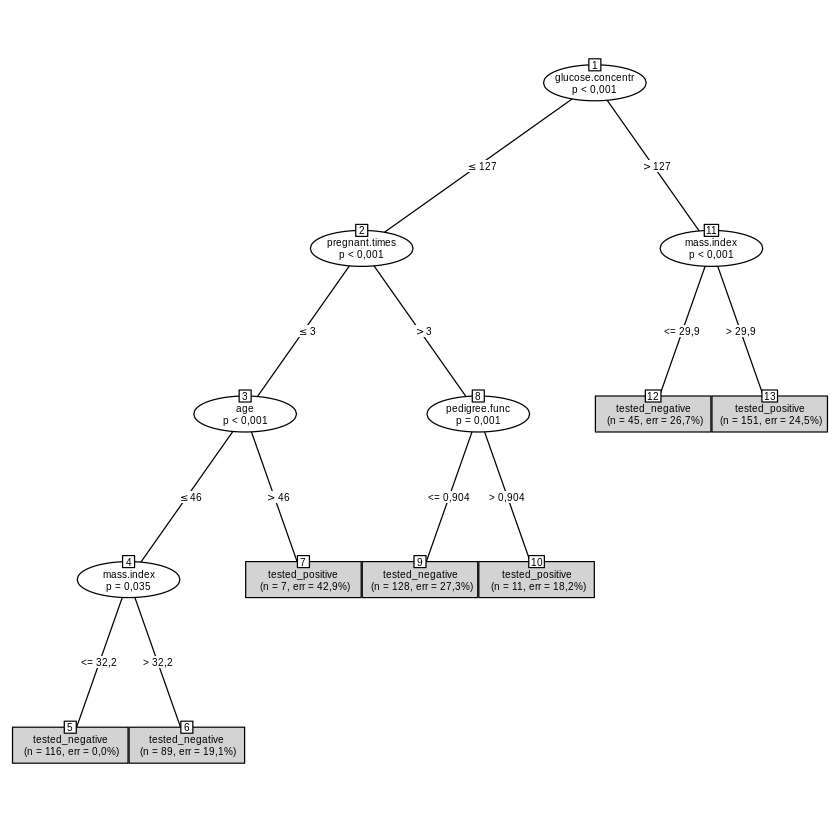

In [9]:
# to jest funkcja ctree z pakietu partykit, nie party
# drzewo jest czasem bardziej uproszczone (częściej generuje mniejszą liczbę węzłów grafu), 
# czasami są pominięte parametry o najmniejszym narzucie/istotności np.: pedigree

# użycie partykit zamiast party zwiększa średnio precyzję modelu drzewa decyzyjnego o ~2% #not great not terrible

plot(diabetes_ctree, type="simple", gp = gpar(fontsize = 6) )

------------------------------------
### KONIEC DRZEWA DECYZYJNEGO
------------------------------------

------------------------------------
### KNN


TRENING DLA klasyfikatorów KNN 3-/5-/11-NN z użyciem danych w tabeli treningData jako zbioru treningowego

------------------------------------

In [10]:
install.packages("DMwR")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [11]:
library(DMwR)

Loading required package: lattice
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


-----------------------------------------------------------
### Model 3-NN KNN

In [12]:
diabetes_knn3_prediction_no_norm <- kNN(class ~ .,trainingData,testData,norm=FALSE,k=3)
diabetes_knn3_prediction_norm <- kNN(class ~ .,trainingData,testData,norm=TRUE,k=3)

In [13]:
# MACIERZE BŁĘDU
confusionmatrix_knn3_not_normalized  <- table(testData[,'class'],diabetes_knn3_prediction_no_norm)
confusionmatrix_knn3_normalized  <- table(testData[,'class'],diabetes_knn3_prediction_norm)

confusionmatrix_knn3_not_normalized


                 diabetes_knn3_prediction_no_norm
                  tested_negative tested_positive
  tested_negative             110              34
  tested_positive              41              36

In [14]:
confusionmatrix_knn3_normalized

                 diabetes_knn3_prediction_norm
                  tested_negative tested_positive
  tested_negative             115              29
  tested_positive              30              47

In [15]:
###WYŚWIETLENIE PROCENTU POPRAWNYCH ODPOWIEDZI DLA KLASYFIKATORA KNN3 DLA ZBIORU TESTOWEGO.
mean(diabetes_knn3_prediction_no_norm == testData$class) * 100
mean(diabetes_knn3_prediction_norm == testData$class) * 100


[1] 66,06335

[1] 73,30317

-----------------------------------------------------------
### Model 5-NN KNN

In [16]:
diabetes_knn5_prediction_no_norm <- kNN(class ~ .,trainingData,testData,norm=FALSE,k=5)
diabetes_knn5_prediction_norm <- kNN(class ~ .,trainingData,testData,norm=TRUE,k=5)

In [17]:
### MACIERZE BŁĘDU
confusionmatrix_knn5_not_normalized  <- table(testData[,'class'],diabetes_knn5_prediction_no_norm)
confusionmatrix_knn5_normalized  <- table(testData[,'class'],diabetes_knn5_prediction_norm)

confusionmatrix_knn5_not_normalized
confusionmatrix_knn5_normalized

                 diabetes_knn5_prediction_no_norm
                  tested_negative tested_positive
  tested_negative             111              33
  tested_positive              36              41

                 diabetes_knn5_prediction_norm
                  tested_negative tested_positive
  tested_negative             114              30
  tested_positive              29              48

In [18]:
### WYŚWIETLENIE PROCENTU POPRAWNYCH ODPOWIEDZI DLA KLASYFIKATORA KNN5 DLA ZBIORU TESTOWEGO.
mean(diabetes_knn5_prediction_no_norm == testData$class) * 100
mean(diabetes_knn5_prediction_norm == testData$class) * 100

[1] 68,77828

[1] 73,30317

### Model 11-NN KNN

In [19]:
diabetes_knn11_prediction_no_norm <- kNN(class ~ .,trainingData,testData,norm=FALSE,k=11)
diabetes_knn11_prediction_norm <- kNN(class ~ .,trainingData,testData,norm=TRUE,k=11)


In [20]:
### MACIERZE BŁĘDU
confusionmatrix_knn11_not_normalized  <- table(testData[,'class'],diabetes_knn11_prediction_no_norm)
confusionmatrix_knn11_normalized  <- table(testData[,'class'],diabetes_knn11_prediction_norm)
confusionmatrix_knn11_not_normalized
confusionmatrix_knn11_normalized 

                 diabetes_knn11_prediction_no_norm
                  tested_negative tested_positive
  tested_negative             115              29
  tested_positive              36              41

                 diabetes_knn11_prediction_norm
                  tested_negative tested_positive
  tested_negative             117              27
  tested_positive              34              43

In [21]:
### WYŚWIETLENIE PROCENTU POPRAWNYCH ODPOWIEDZI DLA KLASYFIKATORA KNN11 DLA ZBIORU TESTOWEGO.
mean(diabetes_knn11_prediction_no_norm == testData$class) * 100
mean(diabetes_knn11_prediction_norm == testData$class) * 100

[1] 70,58824

[1] 72,39819

### ZBIORCZE PRZEDSTAWIENIE DOKŁADNOŚCI dla klasyfikatorów KNN 3-/5-/11-NN 


In [22]:
### ZBIORCZE PRZEDSTAWIENIE DOKŁADNOŚCI dla klasyfikatorów KNN 3-/5-/11-NN 

knn3 <- mean(diabetes_knn3_prediction_no_norm == testData$class) * 100
knn3_norm <- mean(diabetes_knn3_prediction_norm == testData$class) * 100
knn5 <- mean(diabetes_knn5_prediction_no_norm == testData$class) * 100
knn5_norm <- mean(diabetes_knn5_prediction_norm == testData$class) * 100
knn11 <- mean(diabetes_knn11_prediction_no_norm == testData$class) * 100
knn11_norm <- mean(diabetes_knn11_prediction_norm == testData$class) * 100

print(paste("Dokładność modelu knn dla k=3 dla danych nie normalizowanych: ", knn3 , "%.", sep = " "))
print(paste("Dokładność modelu knn dla k=3 dla danych normalizowanych: ", knn3_norm , "%.", sep = " "))
print(paste("Dokładność modelu knn dla k=5 dla danych nie normalizowanych: ", knn5 , "%.", sep = " "))
print(paste("Dokładność modelu knn dla k=5 dla danych normalizowanych: ", knn5_norm , "%.", sep = " "))
print(paste("Dokładność modelu knn dla k=11 dla danych nie normalizowanych: ", knn11 , "%.", sep = " "))
print(paste("Dokładność modelu knn dla k=11 dla danych normalizowanych: ", knn11_norm , "%.", sep = " "))

[1] "Dokładność modelu knn dla k=3 dla danych nie normalizowanych:  66,0633484162896 %."
[1] "Dokładność modelu knn dla k=3 dla danych normalizowanych:  73,3031674208145 %."
[1] "Dokładność modelu knn dla k=5 dla danych nie normalizowanych:  68,7782805429864 %."
[1] "Dokładność modelu knn dla k=5 dla danych normalizowanych:  73,3031674208145 %."
[1] "Dokładność modelu knn dla k=11 dla danych nie normalizowanych:  70,5882352941177 %."
[1] "Dokładność modelu knn dla k=11 dla danych normalizowanych:  72,3981900452489 %."


---------------------------------------------

### KONIEC KLASYFIKATORÓW KNN dla 3-/5-/11-NN

---------------------------------------------

### Klasyfikator NAIVE BAYES

In [23]:
install.packages("e1071")
library(e1071)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [24]:
### WYKONANIE TRENINGU NA BAZIE TRENINGOWEJ trainingData
model_trainingData_naive_bayes <- naiveBayes(class ~ .,data = trainingData)
predictions_NB_trainingData <- predict(model_trainingData_naive_bayes,testData)


In [25]:
### WYŚWIETLENIE PROCENTU POPRAWNYCH ODPOWIEDZI DLA KLASYFIKATORA NAIVE BAYES 
### (wyterenowany na zbiorze trainingData) DLA ZBIORU TESTOWEGO.

NB <- mean(predictions_NB_trainingData == testData$class) * 100
NB

[1] 72,39819

In [26]:
### MACIERZ BŁĘDU
confusionmatrix_NB_trainingData  <- table(testData[,'class'],predictions_NB_trainingData)
confusionmatrix_NB_trainingData

                 predictions_NB_trainingData
                  tested_negative tested_positive
  tested_negative             112              32
  tested_positive              29              48

---------------------------------------------

### KONIEC KLASYFIKATORA NAIVE BAYES

---------------------------------------------

-------------------------------------------------------------------------------------------------------------
### Klasyfikacja wykorzystująca sensowną sieć neuronową dla bazy danych z kobietami z cukrzycą (diabetes.csv)

In [27]:
install.packages("neuralnet")
library(neuralnet)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [28]:
trainingData

pregnant.times glucose.concentr blood.pressure skin.thickness insulin
2    1              85               66            29               0    
5    0             137               40            35             168    
6    5             116               74             0               0    
9    2             197               70            45             543    
10   8             125               96             0               0    
12  10             168               74             0               0    
14   1             189               60            23             846    
16   7             100                0             0               0    
18   7             107               74             0               0    
19   1             103               30            38              83    
20   1             115               70            30              96    
22   8              99               84             0               0    
23   7             196               90             0               0    
24   9             119               80            35               0    
26  10             125               70            26             115    
27   7             147               76             0               0    
28   1              97               66            15             140    
30   5             117               92             0               0    
31   5             109               75            26               0    
33   3              88               58            11              54    
35  10             122               78            31               0    
36   4             103               60            33             192    
37  11             138               76             0               0    
38   9             102               76            37               0    
39   2              90               68            42               0    
40   4             111               72            47             207    
43   7             106               92            18               0    
44   9             171              110            24             240    
45   7             159               64             0               0    
46   0             180               66            39               0    
... ...            ...              ...            ...            ...    
722  1             114              66             36             200    
723  1             149              68             29             127    
725  1             111              94              0               0    
726  4             112              78             40               0    
727  1             116              78             29             180    
729  2             175              88              0               0    
730  2              92              52              0               0    
731  3             130              78             23              79    
734  2             106              56             27             165    
736  4              95              60             32               0    
737  0             126              86             27             120    
739  2              99              60             17             160    
742  3             102              44             20              94    
744  9             140              94              0               0    
746 12             100              84             33             105    
747  1             147              94             41               0    
748  1              81              74             41              57    
749  3             187              70             22             200    
752  1             121              78             39              74    
754  0             181              88             44             510    
755  8             154              78             32               0    
756  1             128              88             39             110    
758  0  

In [29]:
trainingData$tested_negative= trainingData$class == "tested_negative"
trainingData$tested_positive = trainingData$class == "tested_positive"

In [30]:
trainingData

pregnant.times glucose.concentr blood.pressure skin.thickness insulin
2    1              85               66            29               0    
5    0             137               40            35             168    
6    5             116               74             0               0    
9    2             197               70            45             543    
10   8             125               96             0               0    
12  10             168               74             0               0    
14   1             189               60            23             846    
16   7             100                0             0               0    
18   7             107               74             0               0    
19   1             103               30            38              83    
20   1             115               70            30              96    
22   8              99               84             0               0    
23   7             196               90             0               0    
24   9             119               80            35               0    
26  10             125               70            26             115    
27   7             147               76             0               0    
28   1              97               66            15             140    
30   5             117               92             0               0    
31   5             109               75            26               0    
33   3              88               58            11              54    
35  10             122               78            31               0    
36   4             103               60            33             192    
37  11             138               76             0               0    
38   9             102               76            37               0    
39   2              90               68            42               0    
40   4             111               72            47             207    
43   7             106               92            18               0    
44   9             171              110            24             240    
45   7             159               64             0               0    
46   0             180               66            39               0    
... ...            ...              ...            ...            ...    
722  1             114              66             36             200    
723  1             149              68             29             127    
725  1             111              94              0               0    
726  4             112              78             40               0    
727  1             116              78             29             180    
729  2             175              88              0               0    
730  2              92              52              0               0    
731  3             130              78             23              79    
734  2             106              56             27             165    
736  4              95              60             32               0    
737  0             126              86             27             120    
739  2              99              60             17             160    
742  3             102              44             20              94    
744  9             140              94              0               0    
746 12             100              84             33             105    
747  1             147              94             41               0    
748  1              81              74             41              57    
749  3             187              70             22             200    
752  1             121              78             39              74    
754  0             181              88             44             510    
755  8             154              78             32               0    
756  1             128              88             39             110    
758  0  

In [93]:
network_diabetes = neuralnet(tested_negative + tested_positive ~  pregnant.times + glucose.concentr + blood.pressure + skin.thickness + insulin + mass.index + pedigree.func + age , trainingData, stepmax=1e+08, hidden=c(7), linear.output=T)

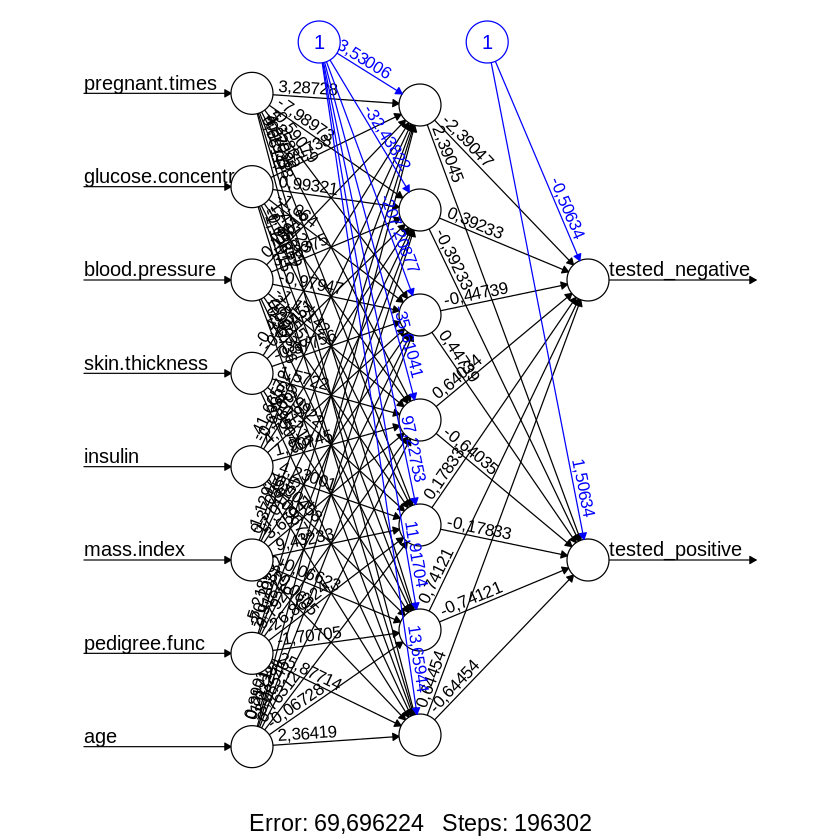

In [94]:
plot(network_diabetes,rep="best")



In [95]:
head(network_diabetes$generalized.weights[[1]])

[,1]          [,2]          [,3]          [,4]          [,5]         
2  -1,461312e-01 -5,408808e-02  8,935458e-03 -1,158781e-02  4,363116e-03
5  -5,605936e+03  6,895782e+02  2,508794e+03 -6,730842e+01 -4,451101e+02
6   1,257986e+00  3,388410e+00  3,434569e+00  1,243215e+00 -1,635842e+01
9  -2,848794e-02 -1,054434e-02  1,741946e-03 -2,259016e-03  8,505791e-04
10 -1,615117e+05  3,265717e+04 -8,820444e+03  1,948516e+04  1,991479e+06
12 -2,055491e-02 -7,608063e-03  1,256867e-03 -1,629948e-03  6,137186e-04
   [,6]          [,7]          [,8]          [,9]          [,10]        
2  -6,310519e-02 -1,626393e+00 -6,409921e-02  1,461371e-01  5,409024e-02
5   2,529342e+02 -4,929223e+04  1,454591e+02  5,417659e+03 -6,664184e+02
6  -5,915706e+01 -1,882362e+01  3,226910e+00 -1,258067e+00 -3,388640e+00
9  -1,230221e-02 -3,170614e-01 -1,249599e-02  2,848811e-02  1,054441e-02
10  5,206868e+04  2,004477e+05 -4,447132e+04  1,301152e+06 -2,630887e+05
12 -8,876415e-03 -2,287694e-01 -9,016235e-03  2,055497e-02  7,608085e-03
   [,11]         [,12]         [,13]         [,14]         [,15]        
2  -8,935816e-03  1,158827e-02 -4,363291e-03  6,310772e-02  1,626458e+00
5  -2,424535e+03  6,504787e+01  4,301609e+02 -2,444391e+02  4,763674e+04
6  -3,434804e+00 -1,243300e+00  1,635953e+01  5,916110e+01  1,882495e+01
9  -1,741957e-03  2,259029e-03 -8,505842e-04  1,230228e-02  3,170633e-01
10  7,105820e+04 -1,569740e+05 -1,604352e+07 -4,194694e+05 -1,614819e+06
12 -1,256871e-03  1,629953e-03 -6,137204e-04  8,876441e-03  2,287701e-01
   [,16]        
2   6,410178e-02
5  -1,405737e+02
6  -3,227129e+00
9   1,249606e-02
10  3,582647e+05
12  9,016261e-03

### EWALUACJA DLA ZBIORU TRENINGOWEGO

In [96]:
predict_NN = compute(network_diabetes, trainingData[, 1:8])

In [97]:
predict_NN_result = predict_NN$net.result

In [98]:
head(predict_NN_result)

[,1]         [,2]      
2  9,542740e-01 0,04572429
5  1,208652e-04 0,99987494
6  9,735524e-01 0,02644571
9  2,984560e-01 0,70154501
10 6,120697e-06 0,99999924
12 9,010461e-02 0,90989526

In [99]:
original_values <- max.col(trainingData[, 10:11])

In [100]:
predicted_NN_max_columns <- max.col(predict_NN_result)

In [101]:
print(paste("Dokładność modelu dla danych treningowych 70% (nieznormalizowanych) : ", round(mean(predicted_NN_max_columns  == original_values)*100, 2), "%. ¯ヽ(ツ)/¯ ", sep = " "))


[1] "Dokładność modelu dla danych treningowych 70% (nieznormalizowanych) :  83 %. ¯ヽ(ツ)/¯ "


In [102]:
# macierz błędu
table(predicted_NN_max_columns , original_values)

                        original_values
predicted_NN_max_columns   1   2
                       1 316  53
                       2  40 138

### EWALUACJA DLA ZBIORU TESTOWEGO

In [103]:
testData$tested_negative = testData$class == "tested_negative"
testData$tested_positive = testData$class == "tested_positive"

In [104]:
head(testData)

pregnant.times glucose.concentr blood.pressure skin.thickness insulin
1   6             148              72             35              0     
3   8             183              64              0              0     
4   1              89              66             23             94     
7   3              78              50             32             88     
8  10             115               0              0              0     
11  4             110              92              0              0     
   mass.index pedigree.func age class           tested_negative tested_positive
1  33,6       0,627         50  tested_positive FALSE            TRUE          
3  23,3       0,672         32  tested_positive FALSE            TRUE          
4  28,1       0,167         21  tested_negative  TRUE           FALSE          
7  31,0       0,248         26  tested_positive FALSE            TRUE          
8  35,3       0,134         29  tested_negative  TRUE           FALSE          
11 37,6       0,191         30  tested_negative  TRUE           FALSE

In [105]:
predict_NN_test_not_norm = compute(network_diabetes, testData[, 1:8])

predict_NN_test_not_norm_result = predict_NN_test_not_norm$net.result

original_values_test <- max.col(testData[, 10:11])

predicted_NN_test_max_columns <- max.col(predict_NN_test_not_norm_result)

print(paste("Dokładność modelu sieci neuronowej dla danych testowych 70% (nie znormalizowanych) : ", round(mean(predicted_NN_test_max_columns  == original_values_test)*100, 2), "%. ¯ヽ(ツ)/¯ ", sep = " "))

NN_no_norm <- round(mean(predicted_NN_test_max_columns  == original_values_test)*100, 2)

# macierz błędu
table(predicted_NN_test_max_columns , original_values_test)

dataframe <- data.frame(original_values_test, predicted_NN_test_max_columns)
dataframe

[1] "Dokładność modelu sieci neuronowej dla danych testowych 70% (nie znormalizowanych) :  72,4 %. ¯ヽ(ツ)/¯ "


                             original_values_test
predicted_NN_test_max_columns   1   2
                            1 114  31
                            2  30  46

original_values_test predicted_NN_test_max_columns
1   2                    2                            
2   2                    1                            
3   1                    1                            
4   2                    1                            
5   1                    2                            
6   1                    1                            
7   1                    1                            
8   2                    2                            
9   2                    1                            
10  1                    1                            
11  2                    2                            
12  1                    2                            
13  2                    2                            
14  1                    1                            
15  1                    2                            
16  1                    2                            
17  1                    1                            
18  2                    1                            
19  2                    1                            
20  1                    1                            
21  1                    1                            
22  1                    1                            
23  1                    1                            
24  1                    2                            
25  1                    1                            
26  2                    1                            
27  1                    1                            
28  2                    2                            
29  1                    1                            
30  1                    1                            
... ...                  ...                          
192 1                    1                            
193 2                    2                            
194 2                    2                            
195 1                    1                            
196 2                    1                            
197 1                    1                            
198 1                    1                            
199 2                    1                            
200 1                    1                            
201 2                    2                            
202 1                    1                            
203 2                    1                            
204 1                    1                            
205 1                    1                            
206 1                    2                            
207 2                    1                            
208 2                    2                            
209 1                    1                            
210 1                    1                            
211 2                    1                            
212 2                    2                            
213 1                    1                            
214 1                    2                            
215 2                    1                            
216 2                    2                            
217 1                    1                            
218 1                    2                            
219 1                    1                            
220 1                    2                            
221 1                    1

### Wykres słupkowy dokładności klasyfikatorów (dla danych testowych)
#### Każdy słupek odpowiada jednemu klasyfikatorowi; wysokość słupka to jego dokładność procentowa. 

In [87]:
install.packages("ggplot2")
library(ggplot2)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


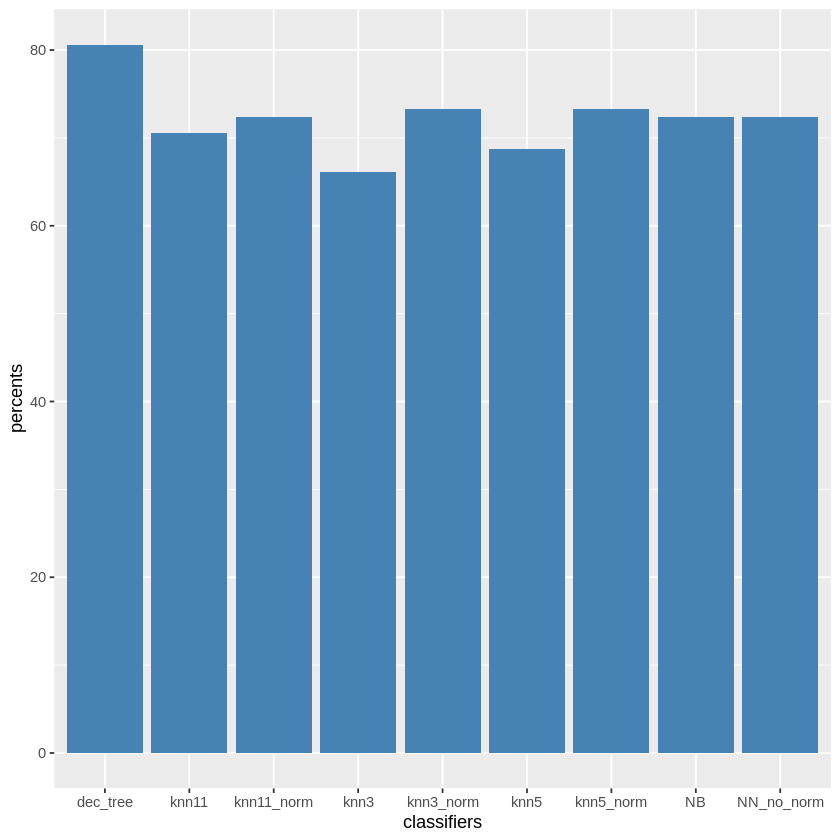

In [106]:

percents <- c(dec_tree,knn3,knn3_norm,knn5,knn5_norm,knn11,knn11_norm,NB,NN_no_norm)
classifiers=c("dec_tree","knn3","knn3_norm","knn5","knn5_norm","knn11","knn11_norm","NB", "NN_no_norm")

df <- data.frame(classifiers,percents)

ggplot(data=df, aes(x=classifiers, y=percents)) + geom_bar(stat="identity", fill="steelblue")


### WNIOSKI 
Pomimo, że dokładność klasyfikatora (sieć neuronowa) wypada w tym momencie dość słabo, <br> 
dla odpowiednich parametrów sieci (przede wszystkim zmiana w obrębie ilości neuronów w warstwach ukrytych oraz metod aktywacji) <br> 
i przy odpowiednio długim czasie uczenia jest możliwe uzyskanie coraz dokładniejszych modeli w porównaniu do modeli knn, decision tree czy naive bayes.<br>
Pomimo oczywistych wad jest to metoda najbardziej obiecująca i perspektywiczna. <br>

Parametr threshold dla paczki neuralnet znacznie wpływa na czas wykonywania uczenia, jednak obniża się dokładność finalnego modelu. <br>
Zmiana parametru z domyślego 0.01 na 0,05 ; 0,1 lub inne pozwala zmniejszyć czas przy szybkim prototypowaniu. <br>
(..., threshold=0.05, ... )

Sam model sieci neuronowej moża uprościć względem przedstawionej powyżej (dwa węzły wyjściowe) zmieniając wyjście na jeden neuron (węzeł output) dający wynik w przedziale od 0 do 1.  <br>
Wymagałoby to nieznacznej wstępnej modyfikacji kolumn.